In [1]:
# Import 3rd-party frameworks.

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import time as tm
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
from Mike_NB_01 import *

In [3]:
# Import the Bot engine.
import sys 
sys.path.append('..')
from ___Engine import *
sys.path.append('../Exchange')
from Utility import *

Engine.ChooseMode(stream=False, show_stream=False, demisser=False, show_demosser=False, traders=True, show_tranders=False, present=True )
engine = Engine()
engine.Start(Config['structure'], Config['timing'])

bn = None
if len(engine.exchanges) > 0:
    bn = engine.exchanges[0]  # Binance exchange

====== Bot: engine is created.
====== Bot: engine is starting...
Initializing Binance singleton...
====== Bot: Traders, and their strategies/indicators, are created.
====== Bot: Traders, and their strategies/indicators, are running...


In [4]:
# Get_Price_Data_By_Time function seamlessly collects/creates price candles from Binance.

start = datetime(2022, 1, 1)    # Any datetime. Note Binance started operation in July 2017.
end = datetime(2023, 3, 16)     # Any datetime
symbol = "BTCUSDT"      # Any pair listed on Binance.
interval = Config['ginterval']    # in '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d'.  (excludes: '3d', '1w')
prePad = True           # prepend with null candles.
#------------------------------------------------------------------------------------------------------------------
candles, nFills, successful, _, reason = bn.Get_Price_Data_By_Time("klines", symbol, interval, start, end, prePad=prePad)
print(reason)
if successful:          # price is a numpy array.
    print("\n!!!!!!!!!! (nCandles, nAttributes) = {}, nCreated = {}".format(candles.shape, nFills))


Get_Price: klines.BTCUSDT.12h.2022-01-01 00:00:00.2023-03-16 00:00:00
Extrapolated candles will be created if initial candles are not available...

!!!!!!!!!! (nCandles, nAttributes) = (879, 10), nCreated = 0


../Exchange/Binance.py:1313: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  dynarray[dynarray == '12.12.03000000'] = 0.0    # AliceUSDT.3m


In [5]:
# Get_Price_Data_By_Time_Batch function executes a batch of Get_Price_Data_By_Time calls.

start = datetime(2023, 1, 1)
end = datetime(2023, 3, 16)
symbols = ["BTCUSDT", "ETHUSDT"]    # Be careful with market symbols.
interval = Config['ginterval']
#-------------------------------------------------------------------------------------------------------
table, nFills, successful_symbols, succesful, = bn.Get_Price_Data_By_Time_Batch("klines", symbols, interval, start, end)
if succesful:   # table is a numpy array.
    print("\n!!!!!!!!!! (nMarkets, nCandles, nAttributes) = {}, nCreated = {}".format(table.shape, nFills))
    print("\n!!!!!!!!!! successful: {}".format(successful_symbols))

Walking through the list...

Get_Price: klines.BTCUSDT.12h.2023-01-01 00:00:00.2023-03-16 00:00:00
Extrapolated candles will be created if initial candles are not available...
BTCUSDT: 149, 0 created. Success. 1-th.

Get_Price: klines.ETHUSDT.12h.2023-01-01 00:00:00.2023-03-16 00:00:00
Extrapolated candles will be created if initial candles are not available...
ETHUSDT: 149, 0 created. Success. 2-th.

Successful for 2/2 markets

!!!!!!!!!! (nMarkets, nCandles, nAttributes) = (2, 149, 10), nCreated = 0

!!!!!!!!!! successful: ['BTCUSDT: 149, 0 created. Success. 1-th.', 'ETHUSDT: 149, 0 created. Success. 2-th.']


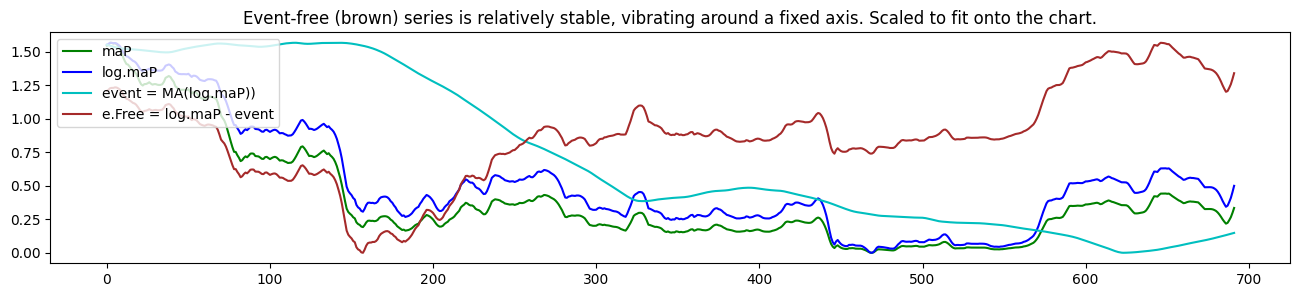

In [6]:
# Assess if event-free series has significance, and at what sigma values.

smallSigma = 3
largeSigma = 60
nLatest = 1440 * 10   # the number of candles to show.
#-----------------------------------------------------------------
Event_Free_Learning_Scheme_10(candles, smallSigma, largeSigma, nLatest)

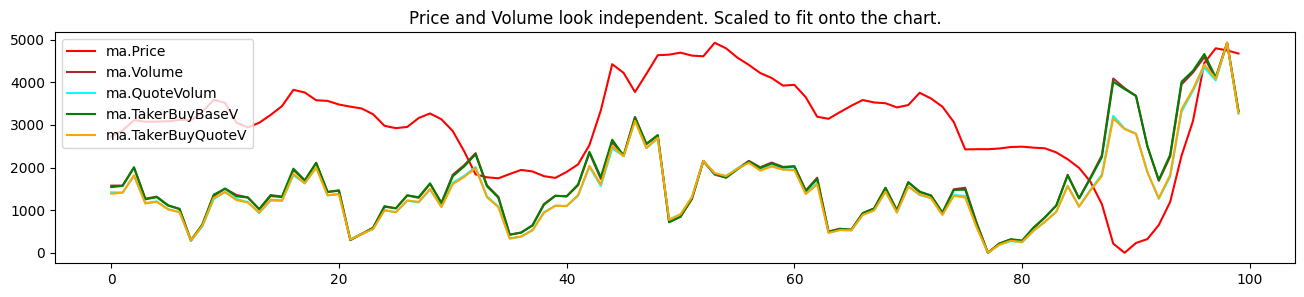

In [7]:
# Guess the best sigma for price and volume

pSigma = 1
vSigma = 1
nLatest = 100  # minutes in a day.
#-------------------------------------------------------------------
Show_Price_Volume_10(candles, pSigma, vSigma, nLatest)

In [8]:
# Get the latest pirces, so quickly as to draw and monitor all 330 -/USDT markets on Binance in real time.
# Note: It will not work during its a few minutes of warming-up period.

nLatest = 2 #3000000    # number of latest cached candles. It's completely normal if one less candles are returned.
#--------------------------------------------------------------

end = datetime.now() # datetime(2023, 2, 20)
start = end - timedelta(minutes=nLatest-1, hours=0)
symbol = "ETHUSDT"; interval = Config['ginterval']
cachedCandles = bn.Get_Cached_Price("klines", symbol, interval, start)
if cachedCandles is not None:
    series = [ (cachedCandles[:,4], "price", "b") ]
    ShowSingle("Latest {} prices.".format(cachedCandles.shape[0]), [(cachedCandles[:,4], "price", "b")])

In [9]:
# Logarithm for placeholder candles ...

In [10]:
# Visualization 01

In [11]:
ready = bn.gstreams_ready
keys = []
while len(keys) < 320:
    tm.sleep(3)
    keys = bn.gstreams.keys()
print(ready, len(keys))

False 342


In [12]:
# Get_Price_Data_By_Time_Batch function executes a batch of Get_Price_Data_By_Time calls.

start = datetime(2018, 1, 1)
# start = datetime(2023, 4, 1)
end = get_current_day_start( datetime.now() ) - timedelta(days=1, minutes=1)

keys = bn.gstreams.keys()
symbols = []
for key in keys:
    (dataType, symbol, interval) = key.split('.')
    symbols.append(symbol)
print(symbols, len(symbols))

interval = Config['ginterval']
#-------------------------------------------------------------------------------------------------------
table, nFills, reports, succesful = bn.Get_Price_Data_By_Time_Batch("klines", symbols, interval, start, end, lookup=True)
if succesful:   # table is a numpy array.
    print("\n!!!!!!!!!! (nMarkets, nCandles, nAttributes) = {}, nCreated = {}".format(table.shape, nFills))
    print("\n!!!!!!!!!! successful: {}".format(successful_symbols))


['ALICEUSDT', 'DOTUSDT', '1INCHUSDT', 'BTCUSDT', 'ETHUSDT', 'MATICUSDT', 'BNBUSDT', 'USDCUSDT', 'XRPUSDT', 'ADAUSDT', 'DOGEUSDT', 'SOLUSDT', 'TRXUSDT', 'LTCUSDT', 'BUSDUSDT', 'SHIBUSDT', 'AVAXUSDT', 'WBTCUSDT', 'LINKUSDT', 'ATOMUSDT', 'UNIUSDT', 'XMRUSDT', 'ETCUSDT', 'XLMUSDT', 'BCHUSDT', 'ICPUSDT', 'TUSDUSDT', 'FILUSDT', 'LDOUSDT', 'APTUSDT', 'HBARUSDT', 'NEARUSDT', 'ARBUSDT', 'VETUSDT', 'APEUSDT', 'QNTUSDT', 'ALGOUSDT', 'GRTUSDT', 'FTMUSDT', 'USDPUSDT', 'RNDRUSDT', 'SANDUSDT', 'EOSUSDT', 'AAVEUSDT', 'RPLUSDT', 'EGLDUSDT', 'CFXUSDT', 'MANAUSDT', 'STXUSDT', 'THETAUSDT', 'XTZUSDT', 'AXSUSDT', 'FLOWUSDT', 'CHZUSDT', 'NEOUSDT', 'CRVUSDT', 'IMXUSDT', 'KAVAUSDT', 'SNXUSDT', 'PEPEUSDT', 'MKRUSDT', 'OPUSDT', 'SUIUSDT', 'KLAYUSDT', 'INJUSDT', 'ZECUSDT', 'LUNCUSDT', 'GMXUSDT', 'MINAUSDT', 'PAXGUSDT', 'IOTAUSDT', 'FXSUSDT', 'XECUSDT', 'DASHUSDT', 'TWTUSDT', 'LRCUSDT', 'WOOUSDT', 'NEXOUSDT', 'ZILUSDT', 'RUNEUSDT', 'CAKEUSDT', 'CVXUSDT', 'MASKUSDT', 'DYDXUSDT', 'ENJUSDT', 'AGIXUSDT', 'BATUSDT', 'F

File Download: /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/ETHUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ETHUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 1/3935/3935
Extrapolated candles will be created if initial candles are not available...
ETHUSDT: 3935, 1 created. Success. 5-th.

Get_Price: klines.MATICUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MATICUSDT/12h/MATICUSDT-12h-2023-05-21.zip ...
patool: running /us

Extrapolated candles will be created if initial candles are not available...320 
TRXUSDT: 3935, 322 created. Success. 12-th.

Get_Price: klines.LTCUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/LTCUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LTCUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 1/3935/3935
Extrapolated candles will be created if initial candles are not available...
LTCUSDT: 3935, 1 created. Success. 13-th.

Get_Price: klines.BUSDUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trad

File Download: /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/XMRUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XMRUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3059/3059
Extrapolated candles will be created if initial candles are not available...874 
XMRUSDT: 3935, 876 created. Success. 21-th.

Get_Price: klines.ETCUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ETCUSDT/12h/ETCUSDT-12h-2023-05-21.zip ...
patool: running /usr/b

File Download: /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/HBARUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/HBARUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2663/2663
Extrapolated candles will be created if initial candles are not available...1270 
HBARUSDT: 3935, 1272 created. Success. 29-th.

Get_Price: klines.NEARUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NEARUSDT/12h/NEARUSDT-12h-2023-05-21.zip ...
pato

Extrapolated candles will be created if initial candles are not available...1050 
FTMUSDT: 3935, 1052 created. Success. 37-th.

Get_Price: klines.USDPUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File not found: https://data.binance.vision/data/spot/monthly/klines/USDPUSDT/12h/USDPUSDT-12h-2022-10.zip????? FAILURE. USDPUSDT, nCreated/nTotal/expected 0/763/None

Get_Price: klines.RNDRUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK OK 
File Download: /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RNDRUSDT/12h/RNDRUSD

File Download: /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/STXUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/STXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2611/2611
Extrapolated candles will be created if initial candles are not available...1322 
STXUSDT: 3935, 1324 created. Success. 46-th.

Get_Price: klines.THETAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/THETAUSDT/12h/THETAUSDT-12h-2023-05-21.zip ...
patool: ru

File Download: /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/IMXUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/IMXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/995/995
Extrapolated candles will be created if initial candles are not available...2938 
IMXUSDT: 3935, 2940 created. Success. 54-th.

Get_Price: klines.KAVAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/KAVAUSDT/12h/KAVAUSDT-12h-2023-05-21.zip ...
patool: running /

Extrapolated candles will be created if initial candles are not available...2046 
INJUSDT: 3935, 2048 created. Success. 62-th.

Get_Price: klines.ZECUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/ZECUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZECUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3047/3047
Extrapolated candles will be created if initial candles are not available...886 
ZECUSDT: 3935, 888 created. Success. 63-th.

Get_Price: klines.LUNCUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/d

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/DASHUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DASHUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3033/3033
Extrapolated candles will be created if initial candles are not available...900 
DASHUSDT: 3935, 902 created. Success. 71-th.

Get_Price: klines.TWTUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/TWTUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TWTUSDT/12h/ -- /mnt/data/Trading/d

File Download: /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/MASKUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MASKUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1455/1455
Extrapolated candles will be created if initial candles are not available...2478 
MASKUSDT: 3935, 2480 created. Success. 80-th.

Get_Price: klines.DYDXUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DYDXUSDT/12h/DYDXUSDT-12h-2023-05-21.zip ...
pato

Extrapolated candles will be created if initial candles are not available...2115 
XEMUSDT: 3935, 2117 created. Success. 88-th.

Get_Price: klines.OSMOUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/OSMOUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/OSMOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/413/413
Extrapolated candles will be created if initial candles are not available...3520 
OSMOUSDT: 3935, 3522 created. Success. 89-th.

Get_Price: klines.ENSUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Downl

File Download: /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/ANKRUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANKRUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2798/2798
Extrapolated candles will be created if initial candles are not available...1135 
ANKRUSDT: 3935, 1137 created. Success. 97-th.

Get_Price: klines.CELOUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CELOUSDT/12h/CELOUSDT-12h-2023-05-21.zip ...
pato

Extrapolated candles will be created if initial candles are not available...3036 
ASTRUSDT: 3935, 3038 created. Success. 105-th.

Get_Price: klines.SSVUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/SSVUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SSVUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/175/175
Extrapolated candles will be created if initial candles are not available...3758 
SSVUSDT: 3935, 3760 created. Success. 106-th.

Get_Price: klines.TUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/d

Extrapolated candles will be created if initial candles are not available...762 
WAVESUSDT: 3935, 764 created. Success. 114-th.

Get_Price: klines.ONEUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/ONEUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ONEUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2903/2903
Extrapolated candles will be created if initial candles are not available...1030 
ONEUSDT: 3935, 1032 created. Success. 115-th.

Get_Price: klines.GLMUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mn

File Download: /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/ZRXUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ZRXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/3089/3089
Extrapolated candles will be created if initial candles are not available...844 
ZRXUSDT: 3935, 846 created. Success. 123-th.

Get_Price: klines.WAXPUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WAXPUSDT/12h/WAXPUSDT-12h-2023-05-21.zip ...
patool: running 

OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2241/2241
Extrapolated candles will be created if initial candles are not available...1692 
HIVEUSDT: 3935, 1694 created. Success. 131-th.

Get_Price: klines.ACHUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/ACHUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ACHUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/995/995
Extrapolated candles will be created if initial candles are not available...2938 
ACHUSDT: 3935, 2940 created. Success. 132-th.

Get_Price: klines.CELRUSDT.12h.201

Extrapolated candles will be created if initial candles are not available...2128 
SKLUSDT: 3935, 2130 created. Success. 140-th.

Get_Price: klines.ANTUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/ANTUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ANTUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2025/2025
Extrapolated candles will be created if initial candles are not available...1908 
ANTUSDT: 3935, 1910 created. Success. 141-th.

Get_Price: klines.UMAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mn

Extrapolated candles will be created if initial candles are not available...3156 
MOBUSDT: 3935, 3158 created. Success. 149-th.

Get_Price: klines.CTSIUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/CTSIUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/CTSIUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2249/2249
Extrapolated candles will be created if initial candles are not available...1684 
CTSIUSDT: 3935, 1686 created. Success. 150-th.

Get_Price: klines.RIFUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File D

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/AMPUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AMPUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1091/1091
Extrapolated candles will be created if initial candles are not available...2842 
AMPUSDT: 3935, 2844 created. Success. 158-th.

Get_Price: klines.LQTYUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/LQTYUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LQTYUSDT/12h/ -- /mnt/data/Trading/d

Extrapolated candles will be created if initial candles are not available...3110 
MULTIUSDT: 3935, 3112 created. Success. 166-th.

Get_Price: klines.PUNDIXUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/PUNDIXUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/PUNDIXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1547/1547
Extrapolated candles will be created if initial candles are not available...2386 
PUNDIXUSDT: 3935, 2388 created. Success. 167-th.

Get_Price: klines.API3USDT.12h.2018-01-01 00:00:00

Extrapolated candles will be created if initial candles are not available...2722 
SYSUSDT: 3935, 2724 created. Success. 175-th.

Get_Price: klines.XNOUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/XNOUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/XNOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/959/959
Extrapolated candles will be created if initial candles are not available...2974 
XNOUSDT: 3935, 2976 created. Success. 176-th.

Get_Price: klines.C98USDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/

Extrapolated candles will be created if initial candles are not available...3541 
HFTUSDT: 3935, 3543 created. Success. 184-th.

Get_Price: klines.NMRUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/NMRUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/NMRUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2012/2012
Extrapolated candles will be created if initial candles are not available...1921 
NMRUSDT: 3935, 1923 created. Success. 185-th.

Get_Price: klines.CVCUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File not found: ht

Extrapolated candles will be created if initial candles are not available...1347 
ARPAUSDT: 3935, 1349 created. Success. 192-th.

Get_Price: klines.ALPHAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/ALPHAUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ALPHAUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1909/1909
Extrapolated candles will be created if initial candles are not available...2024 
ALPHAUSDT: 3935, 2026 created. Success. 193-th.

Get_Price: klines.COTIUSDT.12h.2018-01-01 00:00:00.2023-05-21 2

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/WNXMUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/WNXMUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1995/1995
Extrapolated candles will be created if initial candles are not available...1938 
WNXMUSDT: 3935, 1940 created. Success. 201-th.

Get_Price: klines.RENUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/RENUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RENUSDT/12h/ -- /mnt/data/Tradin

Extrapolated candles will be created if initial candles are not available...2058 
CTKUSDT: 3935, 2060 created. Success. 209-th.

Get_Price: klines.MTLUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/MTLUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MTLUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2737/2737
Extrapolated candles will be created if initial candles are not available...1196 
MTLUSDT: 3935, 1198 created. Success. 210-th.

Get_Price: klines.PHAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mn

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/SPELLUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/SPELLUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1029/1029
Extrapolated candles will be created if initial candles are not available...2904 
SPELLUSDT: 3935, 2906 created. Success. 218-th.

Get_Price: klines.UTKUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/UTKUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/UTKUSDT/12h/ -- /mnt/da

Extrapolated candles will be created if initial candles are not available...2804 
DARUSDT: 3935, 2806 created. Success. 226-th.

Get_Price: klines.LINAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/LINAUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LINAUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1590/1590
Extrapolated candles will be created if initial candles are not available...2343 
LINAUSDT: 3935, 2345 created. Success. 227-th.

Get_Price: klines.IDEXUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File 

Extrapolated candles will be created if initial candles are not available...3079 
BSWUSDT: 3935, 3081 created. Success. 235-th.

Get_Price: klines.TKOUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/TKOUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/TKOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1550/1550
Extrapolated candles will be created if initial candles are not available...2383 
TKOUSDT: 3935, 2385 created. Success. 236-th.

Get_Price: klines.ATAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mn

Extrapolated candles will be created if initial candles are not available...2840 
VGXUSDT: 3935, 2842 created. Success. 244-th.

Get_Price: klines.RAYUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/RAYUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/RAYUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1301/1301
Extrapolated candles will be created if initial candles are not available...2632 
RAYUSDT: 3935, 2634 created. Success. 245-th.

Get_Price: klines.RAREUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /m

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/MLNUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/MLNUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1373/1373
Extrapolated candles will be created if initial candles are not available...2560 
MLNUSDT: 3935, 2562 created. Success. 253-th.

Get_Price: klines.CTXCUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/CTXCUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/CTXCUSDT/12h/ -- /mnt/data/Trading/d

Extrapolated candles will be created if initial candles are not available...2624 
TVKUSDT: 3935, 2626 created. Success. 261-th.

Get_Price: klines.BAKEUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/BAKEUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BAKEUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1504/1504
Extrapolated candles will be created if initial candles are not available...2429 
BAKEUSDT: 3935, 2431 created. Success. 262-th.

Get_Price: klines.XVGUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File D

Extrapolated candles will be created if initial candles are not available...2634 
ALPACAUSDT: 3935, 2636 created. Success. 270-th.

Get_Price: klines.ORNUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/ORNUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ORNUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1929/1929
Extrapolated candles will be created if initial candles are not available...2004 
ORNUSDT: 3935, 2006 created. Success. 271-th.

Get_Price: klines.PHBUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: 

Extrapolated candles will be created if initial candles are not available...2826 
QIUSDT: 3935, 2828 created. Success. 279-th.

Get_Price: klines.AVAUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/AVAUSDT/12h/AVAUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/AVAUSDT/12h/AVAUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/AVAUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/AVAUSDT/12h/AVAUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/AVAUSDT/12h/AVAUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/AVAUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1818/1818
Extrapolated candles will be created if initial candles are not available...2115 
AVAUSDT: 3935, 2117 created. Success. 280-th.

Get_Price: klines.ALPINEUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /

Extrapolated candles will be created if initial candles are not available...1653 
DATAUSDT: 3935, 1655 created. Success. 288-th.

Get_Price: klines.ASTUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/ASTUSDT/12h/ASTUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ASTUSDT/12h/ASTUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ASTUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ASTUSDT/12h/ASTUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ASTUSDT/12h/ASTUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ASTUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/7/7
Extrapolated candles will be created if initial candles are not available...3926 
ASTUSDT: 3935, 3928 created. Success. 289-th.

Get_Price: klines.OGUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data

patool: Extracting /mnt/data/Trading/data/spot/daily/klines/ADXUSDT/12h/ADXUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/ADXUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/ADXUSDT/12h/ADXUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/ADXUSDT/12h/ADXUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/ADXUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1141/1141
Extrapolated candles will be created if initial candles are not available...2792 
ADXUSDT: 3935, 2794 created. Success. 297-th.

Get_Price: klines.REIUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/REIUSDT/12h/REIUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/REIUSDT/12h/REIUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/REIUSDT/12h/ -- /mnt/data/Trading/data/sp

Extrapolated candles will be created if initial candles are not available...2885 
VOXELUSDT: 3935, 2887 created. Success. 305-th.

Get_Price: klines.LAZIOUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/LAZIOUSDT/12h/LAZIOUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/LAZIOUSDT/12h/LAZIOUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/LAZIOUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/LAZIOUSDT/12h/LAZIOUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/LAZIOUSDT/12h/LAZIOUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/LAZIOUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1156/1156
Extrapolated candles will be created if initial candles are not available...2777 
LAZIOUSDT: 3935, 2779 created. Success. 306-th.

Get_Price: klines.DFUSDT.12h.2018-01-01 00:00:00.2023-05-21 23

Extrapolated candles will be created if initial candles are not available...3814 
OAXUSDT: 3935, 3816 created. Success. 314-th.

Get_Price: klines.BURGERUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/BURGERUSDT/12h/BURGERUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/BURGERUSDT/12h/BURGERUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/BURGERUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/BURGERUSDT/12h/BURGERUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/BURGERUSDT/12h/BURGERUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/BURGERUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1504/1504
Extrapolated candles will be created if initial candles are not available...2429 
BURGERUSDT: 3935, 2431 created. Success. 315-th.

Get_Price: klines.VITEUSDT.12h.2018-01-01 00:00:00.2

Extrapolated candles will be created if initial candles are not available...2735 
FIDAUSDT: 3935, 2737 created. Success. 323-th.

Get_Price: klines.DOCKUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/DOCKUSDT/12h/DOCKUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/DOCKUSDT/12h/DOCKUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/DOCKUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/DOCKUSDT/12h/DOCKUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/DOCKUSDT/12h/DOCKUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/DOCKUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/2729/2729
Extrapolated candles will be created if initial candles are not available...1204 
DOCKUSDT: 3935, 1206 created. Success. 324-th.

Get_Price: klines.DREPUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File

Extrapolated candles will be created if initial candles are not available...2742 
CVPUSDT: 3935, 2744 created. Success. 332-th.

Get_Price: klines.JUVUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mnt/data/Trading/data/spot/daily/klines/JUVUSDT/12h/JUVUSDT-12h-2023-05-21.zip
patool: Extracting /mnt/data/Trading/data/spot/daily/klines/JUVUSDT/12h/JUVUSDT-12h-2023-05-21.zip ...
patool: running /usr/bin/7z x -o/mnt/data/Trading/data/spot/daily/klines/JUVUSDT/12h/ -- /mnt/data/Trading/data/spot/daily/klines/JUVUSDT/12h/JUVUSDT-12h-2023-05-21.zip
patool: ... /mnt/data/Trading/data/spot/daily/klines/JUVUSDT/12h/JUVUSDT-12h-2023-05-21.zip extracted to `/mnt/data/Trading/data/spot/daily/klines/JUVUSDT/12h/'.
OK !!!!! SUCCESS. nCreated/nTotal/expected 0/1765/1765
Extrapolated candles will be created if initial candles are not available...2168 
JUVUSDT: 3935, 2170 created. Success. 333-th.

Get_Price: klines.UFTUSDT.12h.2018-01-01 00:00:00.2023-05-21 23:59:00
File Download: /mn

In [13]:
now = datetime.now()
startstring = "-".join([str(start.year%100), str(start.month).zfill(2), str(start.day).zfill(2), str(start.hour).zfill(2), str(start.minute).zfill(2)])
nowstring = "-".join([str(now.year%100), str(now.month).zfill(2), str(now.day).zfill(2), str(now.hour).zfill(2), str(now.minute).zfill(2)])
file_id = "{}-{}-{}".format(startstring, nowstring, Config['ginterval'])

print("table: {}".format(table.shape))
np.save(os.path.join( Config['BinanceCandlesNumpy'], "table-" + file_id), table)
import json
with open(os.path.join( Config['BinanceCandlesNumpy'], "reports-" + file_id + ".json"), "w") as f:
    f.write(json.dumps(reports))

table: (338, 3935, 10)


In [14]:
table = np.load( os.path.join( Config['BinanceCandlesNumpy'], "table-" + file_id + ".npy") )
print("table: {}".format(table.shape))
table_markets = []
with open( os.path.join( Config['BinanceCandlesNumpy'], "reports-" + file_id + ".json"), "r") as f:
    reports = json.loads(f.read())
print(reports)

table: (338, 3935, 10)
['ALICEUSDT: 3935, 2338 created. Success. 1-th.', 'DOTUSDT: 3935, 1921 created. Success. 2-th.', '1INCHUSDT: 3935, 2178 created. Success. 3-th.', 'BTCUSDT: 3935, 1 created. Success. 4-th.', 'ETHUSDT: 3935, 1 created. Success. 5-th.', 'MATICUSDT: 3935, 961 created. Success. 6-th.', 'BNBUSDT: 3935, 1 created. Success. 7-th.', 'USDCUSDT: ', 'XRPUSDT: 3935, 246 created. Success. 8-th.', 'ADAUSDT: 3935, 212 created. Success. 9-th.', 'DOGEUSDT: 3935, 1101 created. Success. 10-th.', 'SOLUSDT: 3935, 1906 created. Success. 11-th.', 'TRXUSDT: 3935, 322 created. Success. 12-th.', 'LTCUSDT: 3935, 1 created. Success. 13-th.', 'BUSDUSDT: 3935, 1254 created. Success. 14-th.', 'SHIBUSDT: 3935, 2450 created. Success. 15-th.', 'AVAXUSDT: 3935, 1990 created. Success. 16-th.', 'WBTCUSDT: 3935, 3886 created. Success. 17-th.', 'LINKUSDT: 3935, 760 created. Success. 18-th.', 'ATOMUSDT: 3935, 966 created. Success. 19-th.', 'UNIUSDT: 3935, 1980 created. Success. 20-th.', 'XMRUSDT: 3935, 

In [15]:
print(table.shape)

(338, 3935, 10)
